# Rogun HPP - Alignment DXF to Nodes in CSV copy

In [1]:
# ToDo
#   all data (e.g. file names) as variables
#   markdown titles
#   comments with explanations
#   this example use grass script, do again with pygrass defining class & methods (to go into API later)


In [2]:
# set up Python for GRASS GIS
import os
import sys
import subprocess
from IPython.display import Image

# set up GRASS GIS runtime environment
gisbase = subprocess.check_output(["grass", "--config", "path"]).strip()
os.environ['GISBASE'] = gisbase
os.environ['GRASS_FONT'] = 'sans'
os.environ['GRASS_OVERWRITE'] = '1'  #overwrite existing maps
sys.path.append(os.path.join(gisbase, "etc", "python"))

# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

# import GRASS GIS
import grass.script as gs
import grass.script.setup as gsetup
from grass.script import core as grass

# for pygrass
from grass.pygrass.modules.shortcuts import raster as r, vector as v, general as g, display as d

from subprocess import PIPE

# further setup for GRASS GIS 
gs.set_raise_on_error(True)
#gs.set_capture_stderr(True)  #might be Python 2 vs 3 issue (unsure if Python 3 required for this Notebook)

False

In [3]:
# https://grasswiki.osgeo.org/wiki/GRASS_Python_Scripting_Library
# GRASS Python Scripting Library
# How to retrieve error messages from read_command():

def read2_command(*args, **kwargs):                                                 #rename to e.g. read_grass
   kwargs['stdout'] = grass.PIPE
   kwargs['stderr'] = grass.PIPE
   ps = grass.start_command(*args, **kwargs)
   return ps.communicate()

In [4]:
# create a mapset (mapset does not already exist)
# should only do once (but will report error and exit if already exists)

# dir /home/kaelin_joseph/projects/RogunHEP/grassdata  should already exist
!grass -c EPSG:3857 /home/kaelin_joseph/projects/RogunHPP/grassdata/RogunHPP -e
# should use grass scipt                                                                             ToDo JK !!    

# define all parameters separately                                                                   ToDo JK !!
#EPSG:3857  #WGS84 Pseudo Mercator

Cleaning up temporary files...
Creating new GRASS GIS location/mapset...
ERROR: Failed to create new location. The location <RogunHPP> already exists.
Exiting...


In [5]:
# open mapset
rcfile = gsetup.init(gisbase, 
         "/home/kaelin_joseph/projects/RogunHPP/grassdata",
         "RogunHPP/", "PERMANENT")

In [6]:
# check grass env
print grass.gisenv()

{'MAPSET': 'PERMANENT', 'GISDBASE': '/home/kaelin_joseph/projects/RogunHPP/grassdata', 'LOCATION_NAME': 'RogunHPP/'}


In [7]:
# check projection info
read2_command('g.proj', flags = 'jf')

('+proj=merc +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +no_defs +a=6378137 +rf=298.257223563 +towgs84=0.000,0.000,0.000 +to_meter=1\n',
 '')

In [8]:
#check mapsets
grass.mapsets()

['PERMANENT']

In [9]:
# read dxf data 
# read2_command("v.in.dxf", input='/home/kaelin_joseph/projects/RogunHPP/data/testing/Aignment_DG4.dxf', 
#              output='alignment_dg4', flags='e')[0]
read2_command("v.in.dxf", input='/home/kaelin_joseph/projects/RogunHPP/data/in/AlignmentDG4.dxf', 
             output='alignment_dg4', flags='e')[0]

# output in 'RogunHPP/PERMANENT/vector/topography2m_r5_reduced'

#read2_command("v.in.dxf")
# pattern for 'printing grass output nicely
#   decode must be applied to each member of tuple
#   [0] -> stdout
#   [1] -> stderr
#   above are according to doc, however it seems that [1] is where all output is                  ToDo JK:  ??

''

In [10]:
# set region from vector data bounds
read2_command('g.region', vector='alignment_dg4')

('', '')

In [11]:
# check grass region
print(g.region(flags='p',stdout_=PIPE).outputs.stdout.decode())


projection: 99 (Mercator)
zone:       0
datum:      wgs84
ellipsoid:  wgs84
north:      23339.93604308
south:      23194.19563225
west:       27580.10817185
east:       27791.7979954
nsres:      1.99644398
ewres:      1.99707381
rows:       73
cols:       106
cells:      7738



In [12]:
# view and check topography
!rm map.png                                                                                 #ToDo JK: pythonize
read2_command("d.vect", map='alignment_dg4', color='green')

('', 'd.vect complete.\n')

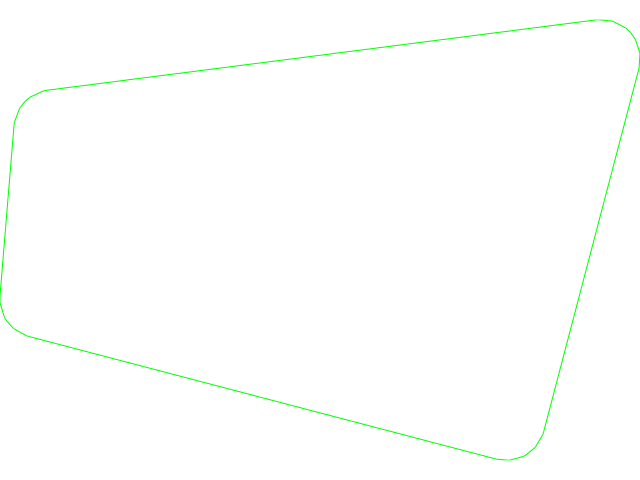

In [13]:
Image(filename="map.png")

In [14]:
points_out = read2_command("v.to.points", input='alignment_dg4', output='alignment_dg4_points') 
print(points_out[1].decode())

         overwritten
   2%   6%   9%  12%  16%  19%  22%  25%  28%  32%  35%  38%  41%  44%  48%  51%  54%  58%  61%  64%  67%  70%  74%  77%  80%  83%  86%  90%  93%  96% 100%
Building topology for vector map <alignment_dg4_points@PERMANENT>...
Registering primitives...
162 primitives registered
162 vertices registered
Building areas...
   0%   2%   4%   6%   8%  10%  12%  14%  16%  18%  20%  22%  24%  26%  28%  30%  32%  34%  36%  38%  40%  42%  44%  46%  48%  50%  52%  54%  56%  58%  60%  62%  64%  66%  68%  70%  72%  74%  76%  78%  80%  82%  84%  86%  88%  90%  92%  94%  96%  98% 100%

In [15]:
# view and check topography
read2_command("d.vect", map='alignment_dg4_points', color='red')

('', 'd.vect complete.\n')

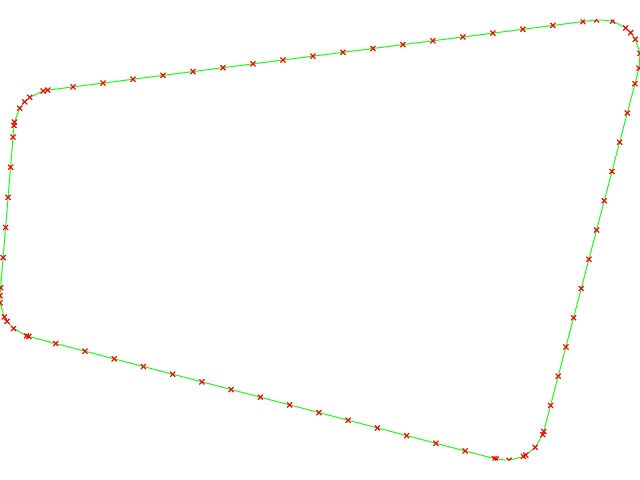

In [16]:
Image(filename="map.png")

In [17]:
read2_command("v.out.ascii", input='alignment_dg4_points', type='point', separator=',',
              output='alignment_dg4_points.csv')


('', '')

In [18]:
!head -5 alignment_dg4_points.csv                                                            #ToDo JK: pythonize

27583.60404637,23291.1348002,1050.49520695,1
27584.42352706,23301.1011662,1050.49520695,1
27588.25316284,23312.77390829,1050.49520695,2
27589.94335163,23314.25737834,1050.49520695,2
27586.61417277,23310.65393938,1050.49520695,3


In [19]:
#!v.out.ascii  --help

In [20]:
read2_command("v.out.ascii", input='alignment_dg4', type='line', format='wkt', 
              output='alignment_dg4_lines.csv')


('', '')

In [21]:
!head -5 alignment_dg4_lines.csv                                                            #ToDo JK: pythonize

LINESTRING(27583.60404637 23291.13480020 1050.49520695, 27584.42352706 23301.10116620 1050.49520695)
LINESTRING(27588.25316284 23312.77390829 1050.49520695, 27589.94335163 23314.25737834 1050.49520695)
LINESTRING(27586.61417277 23310.65393938 1050.49520695, 27588.25316284 23312.77390829 1050.49520695)
LINESTRING(27584.88023421 23306.06464082 1050.49520695, 27586.61417277 23310.65393938 1050.49520695)
LINESTRING(27584.74069620 23304.95851609 1050.49520695, 27584.88023421 23306.06464082 1050.49520695)


In [22]:
# cut LINESTRING (first 10 char's) from each line of 'lines' output file
